In [2]:
#%%
import os
import sys
import glob
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#%%

/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
working = '/home/alal/Desktop/code/eq-svy-eda'
%cd $working
%time hh_all = pd.read_csv(working+'/data/interim/hh_with_geo.csv')

/home/alal/Desktop/code/eq-svy-eda


<string>:2: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 9.21 s, sys: 657 ms, total: 9.86 s
Wall time: 9.99 s


In [5]:
denom = hh_all.shape[0]

In [12]:
hh_all.has_death_occurred_last_12_months.value_counts()/denom
hh_all.is_recipient_rahat_15k.value_counts()/denom
hh_all.income_level_household.value_counts()/denom

0.0    0.97549
1.0    0.02429
Name: has_death_occurred_last_12_months, dtype: float64

1    0.658445
0    0.341555
Name: is_recipient_rahat_15k, dtype: float64

Rs. 10 thousand            0.515760
Rs. 10-20 thousand         0.325626
Rs. 20-30 thousand         0.113273
Rs. 30-50 thousand         0.032325
Rs. 50 thousand or more    0.012797
Name: income_level_household, dtype: float64

In [23]:
mod = smf.logit("has_death_occurred_last_12_months ~ is_recipient_rahat_10k +\
                C(income_level_household)+ C(education_level_household_head)", 
              data=hh_all).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.113659
         Iterations 8
                                   Logit Regression Results                                  
Dep. Variable:     has_death_occurred_last_12_months   No. Observations:              1036340
Model:                                         Logit   Df Residuals:                  1036316
Method:                                          MLE   Df Model:                           23
Date:                               Mon, 12 Feb 2018   Pseudo R-squ.:                0.005734
Time:                                       09:59:42   Log-Likelihood:            -1.1779e+05
converged:                                      True   LL-Null:                   -1.1847e+05
                                                       LLR p-value:                4.361e-273
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

## Summary stats for categorical variables

In [5]:
def return_counts(vname,df='hh_all'):
    return df[vname].value_counts()

In [6]:
income_counts = return_counts('income_level_household', hh_all)
income_counts

Rs. 10 thousand            534620
Rs. 10-20 thousand         337533
Rs. 20-30 thousand         117415
Rs. 30-50 thousand          33507
Rs. 50 thousand or more     13265
Name: income_level_household, dtype: int64

In [7]:
hh_chars = [
    'is_bank_account_present_in_household',
    'income_level_household',
    'household_eq_id_type',
    'education_level_household_head',
    'gender_household_head'
]

eq_effs = [
    'count_death_last_12_months',
    'count_education_drop_last_12_months',
    'count_injury_loss_last_12_months',
    'count_occupation_change_last_12_months',
    'count_pregnancy_treatment_drop_last_12_months',
    'count_vaccination_drop_last_12_months',
    'has_death_occurred_last_12_months',
    'has_education_drop_occurred_last_12_months',
    'has_injury_loss_occurred_last_12_months',
    'has_occupation_change_occurred_last_12_months',
    'has_pregnancy_treatment_drop_occurred_last_12_months',
    'has_vaccination_drop_occurred_last_12_months'
]

pre_post = [
    'has_asset_cable_post_eq', 
    'has_asset_cable_pre_eq', 
    'has_asset_computer_post_eq', 
    'has_asset_computer_pre_eq',
    'has_asset_four_wheeler_commercial_post_eq', 
    'has_asset_four_wheeler_commercial_use_pre_eq', 
    'has_asset_four_wheeler_family_use_post_eq', 
    'has_asset_four_wheeler_family_use_pre_eq', 
    'has_asset_fridge_post_eq',
    'has_asset_fridge_pre_eq',
    'has_asset_internet_post_eq',
    'has_asset_internet_pre_eq',
    'has_asset_land_post_eq',
    'has_asset_land_pre_eq',
    'has_asset_mobile_phone_post_eq',
    'has_asset_mobile_phone_pre_eq',
    'has_asset_motorcycle_post_eq',
    'has_asset_motorcycle_pre_eq',
    'has_asset_none_post_eq'
    'has_asset_none_pre_eq',
    'has_asset_telephone_post_eq',
    'has_asset_telephone_pre_eq',
    'has_asset_tv_post_eq',
    'has_asset_tv_pre_eq',
    'source_cooking_fuel_post_eq',
    'source_cooking_fuel_pre_eq',
    'source_light_post_eq',
    'source_light_pre_eq',
    'source_water_post_eq',
    'source_water_pre_eq',
    'type_toilet_post_eq',
    'type_toilet_pre_eq',
    'residence_district_household_head_post_eq',
    'residence_district_household_head_pre_eq',
    'residence_household_post_eq',
    'residence_household_pre_eq',
]


assist = [
    'is_ineligible_rahat',
    'is_recipient_rahat_10k',
    'is_recipient_rahat_15k',
    'is_recipient_rahat_200k',
    'is_recipient_rahat_none',
    'is_recipient_rahat_social_security_3k'
]

In [8]:
hh_char_counts = [return_counts(v,hh_all) for v in hh_chars]
len(hh_char_counts)

5

In [9]:
eq_effs_counts = [return_counts(v,hh_all) for v in eq_effs]
len(eq_effs_counts)

12

In [10]:
assist_counts = [return_counts(v,hh_all) for v in assist]
len(assist_counts)

6

In [11]:
hh_char_counts[1]

Rs. 10 thousand            534620
Rs. 10-20 thousand         337533
Rs. 20-30 thousand         117415
Rs. 30-50 thousand          33507
Rs. 50 thousand or more     13265
Name: income_level_household, dtype: int64

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text xticklabel objects>)

Text(500,-0.2,'534620')

Text(500,0.8,'337533')

Text(500,1.8,'117415')

Text(500,2.8,'33507')

Text(500,3.8,'13265')

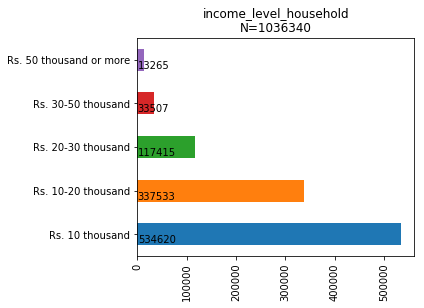

In [12]:
total =  hh_char_counts[1].sum() 
fig, ax = plt.subplots()   
hh_char_counts[1].plot(kind='barh',stacked=True,title=hh_chars[1] + '\n' +
                      'N='+str(total))
plt.tight_layout()
plt.xticks(rotation=90)
i = 0
for v in hh_char_counts[1].iteritems():  
    ax.text(500, i-.2, str(v[1]))
    i += 1

In [13]:
plot_out= '/home/alal/Desktop/code/eq-svy-eda/reports/figures'

In [16]:
%%capture 
for i in range(len(eq_effs_counts)):
    total =  eq_effs_counts[i].sum() 
    eq_effs_counts[i].plot(kind='barh',stacked=True,title=eq_effs[i] + '\n' +
                          'N='+str(total))
    plt.tight_layout()
    plt.xticks(rotation=90)
    j = 0
    for v in eq_effs_counts[i].iteritems():  
        ax.text(500, j-.2, str(v[1]))
        j += 1
    plt.savefig(plot_out+'/'+eq_effs[i]+'.png', dpi = 300)

In [53]:
%%capture
for i in range(len(hh_char_counts)):
    total =  hh_char_counts[i].sum() 
    hh_char_counts[i].plot(kind='barh',stacked=True,title=hh_chars[i] + '\n' +
                          'N='+str(total))
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.savefig(plot_out+'/'+hh_chars[i]+'.png', dpi = 300)

In [54]:
%%capture
for i in range(len(assist_counts)):
    total =  assist_counts[i].sum() 
    assist_counts[i].plot(kind='barh',stacked=True,title=assist[i] + '\n' +
                          'N='+str(total))
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.savefig(plot_out+'/'+assist[i]+'.png', dpi = 300)

## Pre-post comparison - assets

In [135]:
hh_all['has_asset_cable_diff'] = hh_all['has_asset_cable_pre_eq'] - hh_all['has_asset_cable_post_eq']
hh_all['has_asset_computer_diff'] = hh_all['has_asset_computer_pre_eq']- hh_all['has_asset_computer_post_eq']
hh_all['has_asset_four_wheeler_commercial_use_diff'] = hh_all['has_asset_four_wheeler_commercial_use_pre_eq']- hh_all['has_asset_four_wheeler_commercial_post_eq']
hh_all['has_asset_four_wheeler_family_use_diff'] = hh_all['has_asset_four_wheeler_family_use_pre_eq']- hh_all['has_asset_four_wheeler_family_use_post_eq']
hh_all['has_asset_fridge_diff'] = hh_all['has_asset_fridge_pre_eq']- hh_all['has_asset_fridge_post_eq']
hh_all['has_asset_internet_diff'] = hh_all['has_asset_internet_pre_eq']- hh_all['has_asset_internet_post_eq']
hh_all['has_asset_land_diff'] = hh_all['has_asset_land_pre_eq']- hh_all['has_asset_land_post_eq']
hh_all['has_asset_mobile_phone_diff'] = hh_all['has_asset_mobile_phone_pre_eq']- hh_all['has_asset_mobile_phone_post_eq']
hh_all['has_asset_motorcycle_diff'] = hh_all['has_asset_motorcycle_pre_eq']- hh_all['has_asset_motorcycle_post_eq']
hh_all['has_asset_none_diff'] = hh_all['has_asset_none_pre_eq']- hh_all['has_asset_none_post_eq']
hh_all['has_asset_telephone_diff'] = hh_all['has_asset_telephone_pre_eq']- hh_all['has_asset_telephone_post_eq']
hh_all['has_asset_tv_diff'] = hh_all['has_asset_tv_pre_eq']- hh_all['has_asset_tv_post_eq']
hh_all['source_cooking_fuel_diff'] = hh_all['source_cooking_fuel_pre_eq'] == hh_all['source_cooking_fuel_post_eq']
hh_all['source_light_diff'] = hh_all['source_light_pre_eq'] == hh_all['source_light_post_eq']
hh_all['source_water_diff'] = hh_all['source_water_pre_eq'] == hh_all['source_water_post_eq']
hh_all['type_toilet_diff'] = hh_all['type_toilet_pre_eq'] == hh_all['type_toilet_post_eq']
hh_all['residence_district_household_head_diff'] = hh_all['residence_district_household_head_pre_eq'] == hh_all['residence_district_household_head_post_eq']
hh_all['residence_household_diff'] = hh_all['residence_household_pre_eq'] == hh_all['residence_household_post_eq']

In [137]:
diffs = ['household_id','has_asset_cable_diff', 'has_asset_computer_diff', 'has_asset_four_wheeler_commercial_use_diff',
         'has_asset_four_wheeler_family_use_diff', 'has_asset_fridge_diff', 'has_asset_internet_diff', 
         'has_asset_land_diff', 'has_asset_mobile_phone_diff', 'has_asset_motorcycle_diff', 'has_asset_none_diff',
         'has_asset_telephone_diff', 'has_asset_tv_diff', 'source_cooking_fuel_diff', 'source_light_diff',
         'source_water_diff', 'type_toilet_diff', 'residence_district_household_head_diff', 
         'residence_household_diff']
hh_diffs=hh_all[diffs]

hh_diffs.head()

household_id  has_asset_cable_diff  has_asset_computer_diff  \
0  701020001101                     0                        0   
1  701020002101                     0                        0   
2  701020003101                     0                        0   
3  701030001101                     0                        0   
4  701030002101                     0                        0   

   has_asset_four_wheeler_commercial_use_diff  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   has_asset_four_wheeler_family_use_diff  has_asset_fridge_diff  \
0                                       0                      0   
1                                       0                      0   
2                                       0                      0   
3                                       0                      0   
4                                       0                      0   

   has_asset_internet_diff  has_asset_land_diff  has_asset_mobile_phone_diff  \
0                        0                    0                            0   
1                        0                    0                            0   
2                        0                    0                            0   
3                        0                    0                            0   
4                        0                    0                            0   

   has_asset_motorcycle_diff  has_asset_none_diff  has_asset_telephone_diff  \
0                          0                    0                         0   
1                          0                    0                         0   
2                          0                    0                         0   
3                          0                    0                         0   
4                          0                    0                         0   

   has_asset_tv_diff  source_cooking_fuel_diff  source_light_diff  \
0                  0                      True               True   
1                  0                      True               True   
2                  0                      True               True   
3                  0                      True               True   
4                  0                      True               True   

   source_water_diff  type_toilet_diff  \
0               True              True   
1               True              True   
2               True              True   
3               True              True   
4               True              True   

   residence_district_household_head_diff  residence_household_diff  
0                                   False                      True  
1                                   False                      True  
2                                   False                      True  
3                                   False                      True  
4                                   False                      True